In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stock = yf.Ticker("AAPL")
df = stock.history(period="2y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-24 00:00:00-04:00,165.486463,166.267799,164.428181,165.694153,53841500,0.0,0.0
2022-08-25 00:00:00-04:00,166.930431,168.275528,166.505150,168.166733,51218200,0.0,0.0
2022-08-26 00:00:00-04:00,168.700848,169.175583,161.767656,161.826996,78961000,0.0,0.0
2022-08-29 00:00:00-04:00,159.384067,161.114890,158.068654,159.611557,73314000,0.0,0.0
2022-08-30 00:00:00-04:00,160.353325,160.778606,155.991648,157.168610,77906200,0.0,0.0


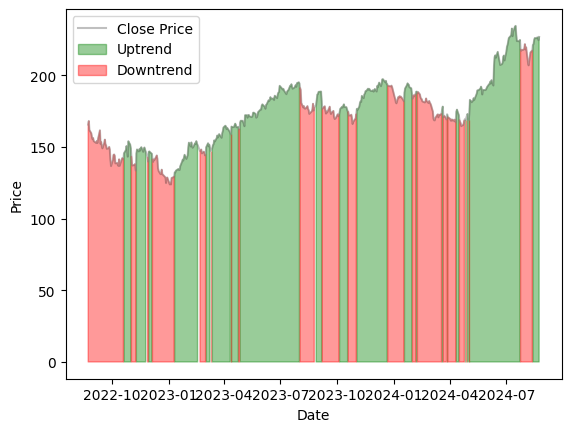

In [2]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Trend_SMA'] = df['Close'] > df['SMA_20']

plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.5)
plt.fill_between(df.index, df['Close'], where=df['Trend_SMA'], color='green', alpha=0.4, label='Uptrend')
plt.fill_between(df.index, df['Close'], where=~df['Trend_SMA'], color='red', alpha=0.4, label='Downtrend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

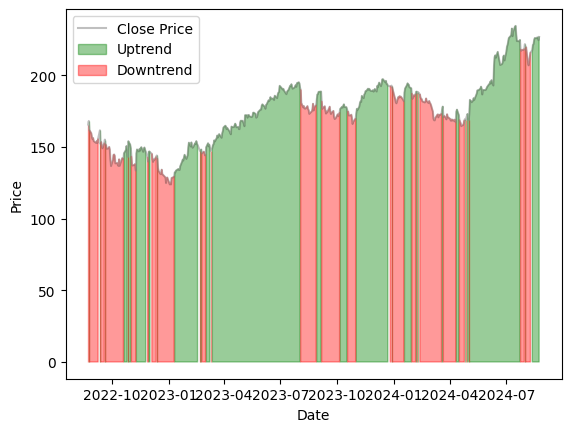

In [3]:
df['EMA_20'] = df['Close'].ewm(span=20).mean()
df['Trend_EMA'] = df['Close'] > df['EMA_20']

plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.5)
plt.fill_between(df.index, df['Close'], where=df['Trend_EMA'], color='green', alpha=0.4, label='Uptrend')
plt.fill_between(df.index, df['Close'], where=~df['Trend_EMA'], color='red', alpha=0.4, label='Downtrend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

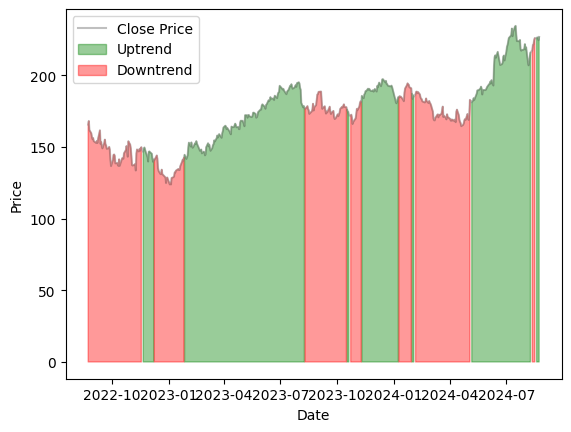

In [4]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['Trend_SMA_'] = df['SMA_10'] > df['SMA_50']

plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.5)
plt.fill_between(df.index, df['Close'], where=df['Trend_SMA_'], color='green', alpha=0.4, label='Uptrend')
plt.fill_between(df.index, df['Close'], where=~df['Trend_SMA_'], color='red', alpha=0.4, label='Downtrend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

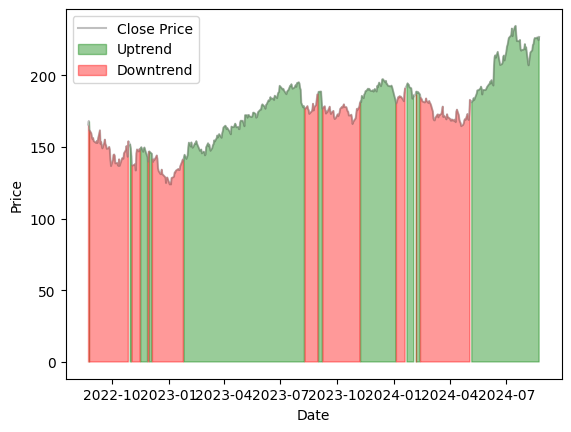

In [5]:
df['EMA_50'] = df['Close'].ewm(span=50).mean()
df['EMA_10'] = df['Close'].ewm(span=10).mean()
df['Trend_EMA_'] = df['EMA_10'] > df['EMA_50']

plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.5)
plt.fill_between(df.index, df['Close'], where=df['Trend_EMA_'], color='green', alpha=0.4, label='Uptrend')
plt.fill_between(df.index, df['Close'], where=~df['Trend_EMA_'], color='red', alpha=0.4, label='Downtrend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
import plotly.graph_objs as go
import plotly.express as px

In [23]:
stock = yf.Ticker("AAPL")
df = stock.history(period="2y")

df.reset_index(inplace=True)

df['Date'] = pd.to_datetime(df['Date'], '%Y-%m-%d')

df['EMA_50'] = df['Close'].ewm(span=50).mean()
df['EMA_10'] = df['Close'].ewm(span=10).mean()
df['Trend_EMA_'] = df['EMA_10'] > df['EMA_50']
df['Trend_Change'] = df['Trend_EMA_'].ne(df['Trend_EMA_'].shift())
df['Trend_ID'] = df['Trend_Change'].cumsum()

trend_data = df.groupby('Trend_ID').agg(
    Start_Date=('Date', 'first'),
    End_Date=('Date', 'last'),
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last'),
    Trend=('Trend_EMA_', 'first')
).reset_index()

trend_data['Change_Rate'] = (trend_data['End_Price'] - trend_data['Start_Price']) / trend_data['Start_Price'] * 100

In [24]:
trend_data

,Trend_ID,Start_Date,End_Date,Start_Price,End_Price,Trend,Change_Rate
0,1,2022-08-24 00:00:00-04:00,2022-08-24 00:00:00-04:00,165.694138,165.694138,False,0.000000
1,2,2022-08-25 00:00:00-04:00,2022-08-25 00:00:00-04:00,168.166733,168.166733,True,0.000000
2,3,2022-08-26 00:00:00-04:00,2022-10-28 00:00:00-04:00,161.826996,154.033340,False,-4.816042
3,4,2022-10-31 00:00:00-04:00,2022-11-02 00:00:00-04:00,151.659637,143.440704,True,-5.419328
4,5,2022-11-03 00:00:00-04:00,2022-11-16 00:00:00-05:00,137.358109,147.403610,False,7.313366
5,6,2022-11-17 00:00:00-05:00,2022-11-28 00:00:00-05:00,149.315628,142.876205,True,-4.312625
6,7,2022-11-29 00:00:00-05:00,2022-11-30 00:00:00-05:00,139.854599,146.650696,False,4.859402
7,8,2022-12-01 00:00:00-05:00,2022-12-05 00:00:00-05:00,146.928085,145.263779,True,-1.132736
8,9,2022-12-06 00:00:00-05:00,2023-01-25 00:00:00-05:00,141.578400,140.538208,False,-0.734711
9,10,2023-01-26 00:00:00-05:00,2023-08-09 00:00:00-04:00,142.618622,177.043777,True,24.137911


In [32]:
df[(df['Date'] >= '2022-10-29') & (df['Date'] < '2022-10-31')]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_50,EMA_10,Trend_EMA_,Trend_Change,Trend_ID


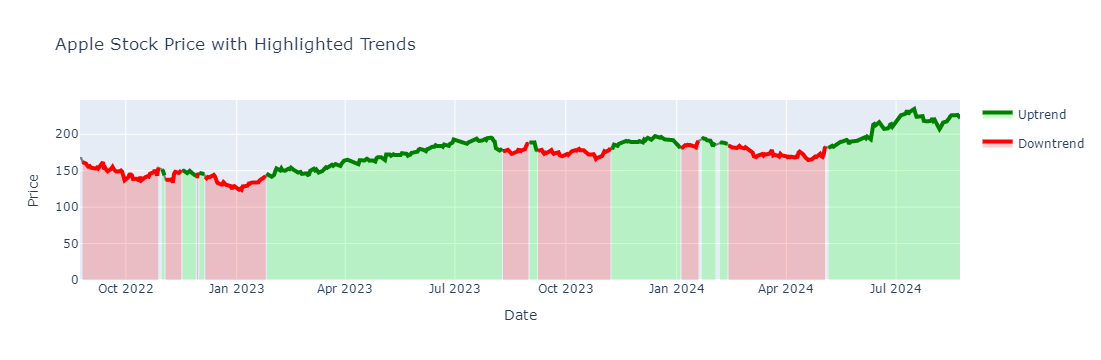

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='gray', width=2),
    hoverinfo='skip',
    showlegend=False
))

# Plot uptrends
for idx, trend in trend_data[trend_data['Trend']].iterrows():
    trend_df = df[(df['Date'] >= trend['Start_Date']) & (df['Date'] <= trend['End_Date'])]
    fig.add_trace(go.Scatter(
        x=trend_df['Date'],
        y=trend_df['Close'],
        mode='lines',
        name='Uptrend',
        line=dict(color='green', width=4),
        fill='tozeroy',
        fillcolor='rgba(0, 255, 0, 0.2)',
        hovertemplate=(
            "Date: %{x}<br>"
            "Price: $%{y:.2f}<br><br>"
            f"Start Date: {trend['Start_Date']}<br>"
            f"End Date: {trend['End_Date']}<br>"
            f"Change Rate: {trend['Change_Rate']:.2f}%<extra></extra>"
        ),
        legendgroup='Uptrend',
        showlegend=True if idx == trend_df.index[-1] else False
    ))

# Plot downtrends
for idx, trend in trend_data[~trend_data['Trend']].iterrows():
    trend_df = df[(df['Date'] >= trend['Start_Date']) & (df['Date'] <= trend['End_Date'])]
    fig.add_trace(go.Scatter(
        x=trend_df['Date'],
        y=trend_df['Close'],
        mode='lines',
        name='Downtrend',
        line=dict(color='red', width=4),
        fill='tozeroy',
        fillcolor='rgba(255, 0, 0, 0.2)',
        hovertemplate=(
            "Date: %{x}<br>"
            "Price: $%{y:.2f}<br><br>"
            f"Start Date: {trend['Start_Date']}<br>"
            f"End Date: {trend['End_Date']}<br>"
            f"Change Rate: {trend['Change_Rate']:.2f}%<extra></extra>"
        ),
        legendgroup='Downtrend',
        showlegend=True if idx == trend_df.index[-1] else False
    ))

fig.update_layout(
    title="Apple Stock Price with Highlighted Trends",
    xaxis_title="Date",
    yaxis_title="Price",
    showlegend=True,
    hovermode="x unified"
)

fig.show()

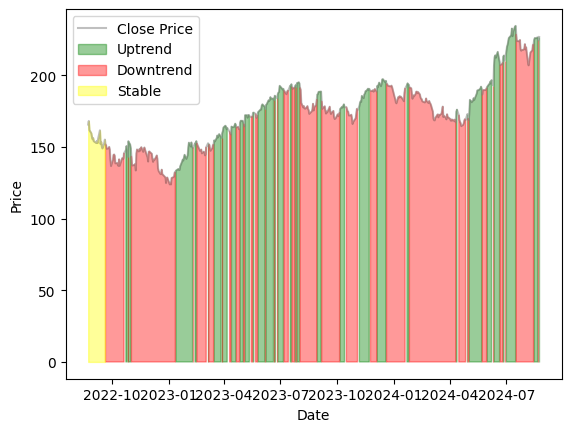

In [8]:
df['Middle_Band'] = df['Close'].rolling(window=20).mean()

df['Upper_Band'] = df['Middle_Band'] + df['Close'].rolling(window=20).std()

df['Lower_Band'] = df['Middle_Band'] - df['Close'].rolling(window=20).std()
df['Trend_BB_up'] = df['Close'] > df['Upper_Band']
df['Trend_BB_down'] = df['Close'] < df['Upper_Band']
plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.5)
plt.fill_between(df.index, df['Close'], where=df['Trend_BB_up'], color='green', alpha=0.4, label='Uptrend')
plt.fill_between(df.index, df['Close'], where=df['Trend_BB_down'], color='red', alpha=0.4, label='Downtrend')
plt.fill_between(df.index, df['Close'], where=((~df['Trend_BB_down'])&(~df['Trend_BB_up'])), color='yellow', alpha=0.4, label='Stable')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

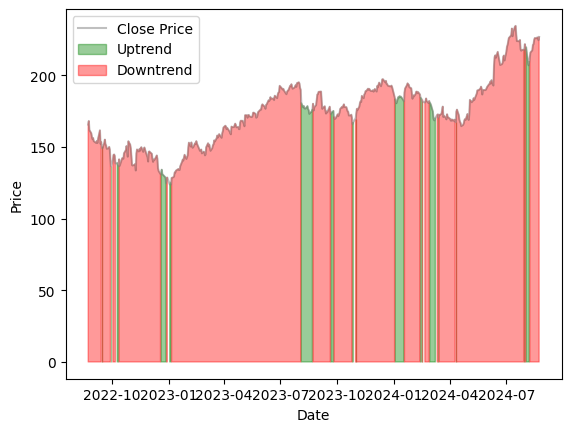

In [10]:
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))
df['Trend_RSI'] = df['RSI'] < 30
plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.5)
plt.fill_between(df.index, df['Close'], where=df['Trend_RSI'], color='green', alpha=0.4, label='Uptrend')
plt.fill_between(df.index, df['Close'], where=~df['Trend_RSI'], color='red', alpha=0.4, label='Downtrend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()